In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi, sin, cos

In [5]:
def phase_thickness(n, d, w):
    return 2*pi*n*d/w

def TF_matrix(n, d, w):
    delta = phase_thickness(n, d, w)
    ita = n
    matrix = np.reshape(
        (cos(delta), 1j/ita*sin(delta), 1j*ita*sin(delta), cos(delta)),
        (2, 2))
    return matrix

def Eq_admittance(mtf, ns):
    B, C = mtf.dot(np.reshape((1, ns), (2, 1)))
    return C/B

def reflectance(n, d, w, n_s, n_0):
    mtf = TF_matrix(n, d, w)
    Y = Eq_admittance(mtf, n_s)
    r = (n_0-Y[0])/(n_0+Y[0])
    return r*r.conjugate()


In [3]:
n = 1.4 # index
d = 1500 # thickness (nm)
ns = 1.8
n0 = 1

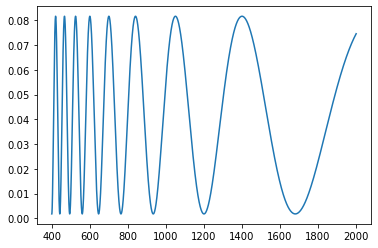

In [4]:
w = np.linspace(400, 2000, 10000)
R = list(map(lambda x: reflectance(n, d, x, ns, n0), w))
plt.figure()
plt.plot(w, R)
plt.show()